# 1. Проблема

![task1](task1.png)

# 2. Содержательная постановка

Необходимо провести проверку соблюдения закона Ома для участка цепи, состоящего из элемента питания, резистора и амперметра, подключенных последовательно. Известны значения напряжения, а также значения силы тока на участке цепи.

# 3. Формальная постановка

Пусть 

- $U = {U_1,U_2,\dots,U_n}$ - пространство зафиксированных (подаваемых) значений напряжения на участок цепи.

- $I = {I_1,I_2,\dots,I_n}$ - простраство случайных (измеренных) значений силы тока в участке цепи.

Задача:

$$
\textrm{MSE} \rightarrow \min
$$

Условия

$$
U_n > 0\\
I_n > 0\\
w > 0
$$


# 4. Алгоритм и ПО

Мы предполагаем, что согласно закону Ома для участка цепи ($I = \frac{U}{R}$) истинная связь между $U$ и $I$ является линейной, плюс некоторая случайная ошибка:

$$
I_i = f(w,U_i)+\varepsilon_i
$$

В данном случае в качестве веса будет выступать проводимость $\frac{1}{R}$.

Проверку состоятельности модели закона Ома будем проводить рассчитывая коэффициент детерминации $\mathbf{R}^2$. 

Если $\mathbf{R}^2$ выше $50$%, то модель будем считать приемлемой.

Если $\mathbf{R}^2$ выше $80$%, то модель будем считать хорошей.

В качестве алгоритма будем использовать МНК

В качестве ПО будем использовать ЯП python, с подключенными модулями:

- numpy - для работы с линейной алгеброй

- sklearn - для линейной регрессии

- seaborn - для построения графиков

# 5. Решение задачи

Приведем решение задачи с применением выбранного алгоритма.

Подключим необходимые модули

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

Предоставим данные

In [2]:
U = np.array([0, 5, 15, 25, 35, 45, 55]).reshape((-1, 1))
I = np.array([0, 5, 20, 19, 32, 38, 48])

Создадим экземпляр класса модели линейной регрессии и посчитаем $\mathbf{R}^2$

In [3]:
model = LinearRegression(fit_intercept = False).fit(U, I)

r_sq = model.score(U, I)
w = model.coef_

print('Коэффициент детерминации:', r_sq)
print('Проводимость:', w[0])

Коэффициент детерминации: 0.9669999878497746
Проводимость: 0.8769230769230768


# 6. Анализ

Проведем анализ результатов:

Исходя из вычисленного коэффициента детерминации - доли объясненной моделью дисперсии, получаем:

In [4]:
if r_sq >= 0.8:
    print('Модель хорошая. Закон Ома выполняется')
elif r_sq >= 0.5:
    print('Модель приемлемая. Закон Ома выполняется')
else:
    print('Модель непримемлемая. Закон Ома не выполняется')

Модель хорошая. Закон Ома выполняется


Построим график

<AxesSubplot:>

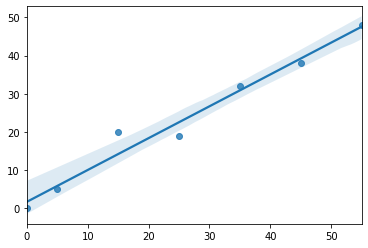

In [5]:
sns.regplot(x=U, y=I);

Из него видно, что зависимость линейная. Соответственно закон Ома выполняется.